In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

import xgboost as xgb

In [33]:
##-------------------------------------------------------------------------##

###SKIP THIS STEP:::HAS TO BE DONE JUST ONCE TO CREATE THE COMBINED DATA. 

##-------------------------------------------------------------------------##
df = pd.read_csv("fast rest.csv")
df.drop(["Unnamed: 10"], axis = 1, inplace=True)

stuff=np.full((len(df)), 1)
#print(len(stuff))
#print(len(df))
#print(stuff)
df['label']=stuff
df.to_csv("labeled_fast_rest.csv")

df2 = pd.read_csv("/home/dhananjai/Downloads/MSEE/fast/2_straight_drive/fast strt drive.csv")
df2.drop(["Unnamed: 10"], axis = 1, inplace=True)
stuff=np.full((len(df2)), 2)
df2['label']=stuff
df2.to_csv("labeled_straight_drive.csv")

df3 = pd.read_csv("/home/dhananjai/Downloads/MSEE/fast/3_on_drive/fast on drive.csv")
df3.drop(["Unnamed: 10"], axis = 1, inplace=True)
stuff=np.full((len(df3)), 3)
df3['label']=stuff
df3.to_csv("labeled_on_drive.csv")

df4 = pd.read_csv("/home/dhananjai/Downloads/MSEE/fast/4_cover_drive/fast cover drive.csv")
df4.drop(["Unnamed: 10"], axis = 1, inplace=True)
stuff=np.full((len(df4)), 4)
df4['label']=stuff
df4.to_csv("labeled_cover_drive.csv")

df5 = pd.read_csv("/home/dhananjai/Downloads/MSEE/fast/5_leg_glance/fast leg glance.csv")
df5.drop(["Unnamed: 10"], axis = 1, inplace=True)
stuff=np.full((len(df5)), 5)
df5['label']=stuff
df5.to_csv("labeled_leg_glance.csv")

df6 = pd.read_csv("/home/dhananjai/Downloads/MSEE/fast/6_cut/fast cut.csv")
df6.drop(["Unnamed: 10"], axis = 1, inplace=True)
stuff=np.full((len(df6)), 6)
df6['label']=stuff
df6.to_csv("labeled_cut.csv")

df7 = pd.read_csv("/home/dhananjai/Downloads/MSEE/fast/7_pull/fast pull.csv")
df7.drop(["Unnamed: 10"], axis = 1, inplace=True)
stuff=np.full((len(df7)), 7)
df7['label']=stuff
df7.to_csv("labeled_pull.csv")

df8 = pd.read_csv("/home/dhananjai/Downloads/MSEE/fast/8_square_cut/fast square cut.csv")
df8.drop(["Unnamed: 10"], axis = 1, inplace=True)
stuff=np.full((len(df8)), 8)
df8['label']=stuff
df8.to_csv("labeled_square_cut.csv")

In [92]:
##-------------------------------------------------------------------------##

###SKIP THIS STEP:::HAS TO BE DONE JUST ONCE TO CREATE THE COMBINED DATA. 

##-------------------------------------------------------------------------##
frames = [ df,df2,df3,df4,df5,df6,df7,df8 ]
combined_df = pd.concat(frames,ignore_index=True)
combined_df.to_csv("labeled_combined_df.csv")
combined_df.drop(['time'], axis = 1, inplace=True)
combined_df

,ax,ay,az,wx,wy,wz,Azimuth,Pitch,Roll,label
0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1
1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,231.6406,-144.9688,54.5156,1
2,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,231.6406,-144.9688,54.5156,1
3,0.0000,0.0000,0.0000,0.0362,-0.2674,0.0085,231.6406,-144.9688,54.5156,1
4,9.2446,1.4433,8.0898,0.0362,-0.2674,0.0085,231.6406,-144.9688,54.5156,1
...,...,...,...,...,...,...,...,...,...,...
113515,9.3621,5.1290,12.7252,0.1800,0.0533,-0.2184,262.9531,-23.6875,1.1406,8
113516,9.1355,4.9707,12.3128,0.1800,0.0533,-0.2184,262.9531,-23.6875,1.1406,8
113517,9.1355,4.9707,12.3128,0.1800,0.0533,-0.2184,262.9531,-23.6875,1.1406,8
113518,9.1355,4.9707,12.3128,0.2248,0.0906,-0.1822,262.9531,-23.6875,1.1406,8


In [75]:
##-------------------------------------------------------------------------##

###SKIP THIS STEP:::HAS TO BE DONE JUST ONCE TO CREATE THE COMBINED DATA. 

##-------------------------------------------------------------------------##
print(combined_df.loc[combined_df['label']==1, ['Azimuth']])
print((combined_df.loc[combined_df['label']==2, ['Azimuth']].values))

        Azimuth
0        0.0000
1      231.6406
2      231.6406
3      231.6406
4      231.6406
...         ...
28652  224.3438
28653  224.2500
28654  224.2500
28655  224.2500
28656  224.2500

[28657 rows x 1 columns]
[[  0.    ]
 [  0.    ]
 [  0.    ]
 ...
 [212.8906]
 [212.8906]
 [212.8906]]


In [2]:
##-------------------------------------------------------------------------##

###START HERE. 

##-------------------------------------------------------------------------##

combined_df = pd.read_csv("labeled_combined_df.csv")
try:
    combined_df.drop(["Unnamed: 0"], axis = 1, inplace=True)
    combined_df.drop(["time"], axis = 1, inplace=True)
    combined_df.reset_index(drop=True, inplace=True)
except:
    pass

y=combined_df.label
x=combined_df.drop('label',axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

combined_df

,ax,ay,az,wx,wy,wz,Azimuth,Pitch,Roll,label
0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1
1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,231.6406,-144.9688,54.5156,1
2,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,231.6406,-144.9688,54.5156,1
3,0.0000,0.0000,0.0000,0.0362,-0.2674,0.0085,231.6406,-144.9688,54.5156,1
4,9.2446,1.4433,8.0898,0.0362,-0.2674,0.0085,231.6406,-144.9688,54.5156,1
...,...,...,...,...,...,...,...,...,...,...
113515,9.3621,5.1290,12.7252,0.1800,0.0533,-0.2184,262.9531,-23.6875,1.1406,8
113516,9.1355,4.9707,12.3128,0.1800,0.0533,-0.2184,262.9531,-23.6875,1.1406,8
113517,9.1355,4.9707,12.3128,0.1800,0.0533,-0.2184,262.9531,-23.6875,1.1406,8
113518,9.1355,4.9707,12.3128,0.2248,0.0906,-0.1822,262.9531,-23.6875,1.1406,8


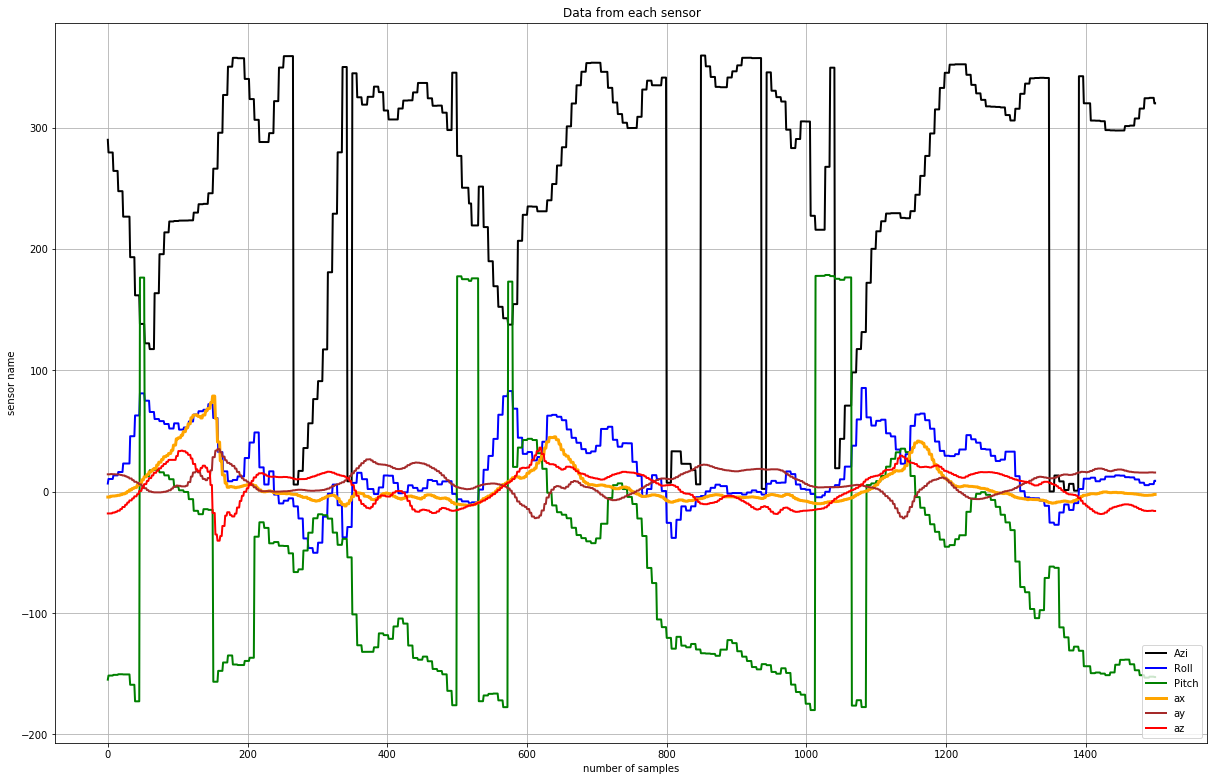

In [35]:

fig= plt.figure(figsize=(8,5))
ax1= fig.add_axes([0.1,0.1,2,2])


ax1.plot(combined_df.loc[combined_df['label']==6]['Azimuth'][2000:3500].values,color='black',label="Azi",LineWidth = 2)
ax1.plot(combined_df.loc[combined_df['label']==6]['Roll'][2000:3500].values,color='blue',label="Roll",LineWidth = 2)
ax1.plot(combined_df.loc[combined_df['label']==6]['Pitch'][2000:3500].values,color='green',label="Pitch",LineWidth = 2)

ax1.plot(combined_df.loc[combined_df['label']==6]['ax'][2000:3500].values,color='orange',label="ax",LineWidth = 3)
ax1.plot(combined_df.loc[combined_df['label']==6]['ay'][2000:3500].values,color='brown',label="ay",LineWidth = 2)
ax1.plot(combined_df.loc[combined_df['label']==6]['az'][2000:3500].values,color='red',label="az",LineWidth = 2)

ax1.set(xlabel='number of samples', ylabel = 'sensor name', title = 'Data from each sensor')
ax1.grid()
plt.legend(loc='lower right')
plt.show()

In [5]:
#display(x_train)
#display(y_train)

#display(x_test)
#display(y_test)

In [21]:
qda_clf = QuadraticDiscriminantAnalysis()
qda_clf.fit(x_train,y_train)
y_out = qda_clf.fit(x_train, y_train).predict(x_test)

#print(y_out)
print(classification_report(y_test, y_out))#target_names=['Not Six', 'Six']
#IF QDA is best, then data must be Gaussian



              precision    recall  f1-score   support

           1       0.97      0.97      0.97      5855
           2       0.83      0.93      0.87      1982
           3       0.76      0.77      0.76      2406
           4       0.90      0.87      0.89      2847
           5       0.83      0.74      0.78      2837
           6       0.86      0.86      0.86      2291
           7       0.75      0.77      0.76      2284
           8       0.72      0.73      0.72      2202

    accuracy                           0.85     22704
   macro avg       0.82      0.83      0.83     22704
weighted avg       0.85      0.85      0.85     22704



In [22]:
model_to_test=qda_clf
length=len(combined_df)-1


test_sample=combined_df.loc[combined_df['label']==1].copy()
try:
    test_sample.drop(["label"], axis = 1, inplace=True)
    test_sample.drop(["time"], axis = 1, inplace=True)
    test_sample.reset_index(drop=True, inplace=True)
except:
    pass
pred_out1=np.array( (model_to_test.predict(test_sample)) )


test_sample=combined_df.loc[combined_df['label']==2].copy()
try:
    test_sample.drop(["label"], axis = 1, inplace=True)
    test_sample.drop(["time"], axis = 1, inplace=True)
    test_sample.reset_index(drop=True, inplace=True)
except:
    pass
pred_out2=np.array( (model_to_test.predict(test_sample)) )


test_sample=combined_df.loc[combined_df['label']==3].copy()
try:
    test_sample.drop(["label"], axis = 1, inplace=True)
    test_sample.drop(["time"], axis = 1, inplace=True)
    test_sample.reset_index(drop=True, inplace=True)
except:
    pass
pred_out3=np.array( (model_to_test.predict(test_sample)) )

test_sample=combined_df.loc[combined_df['label']==4].copy()
try:
    test_sample.drop(["label"], axis = 1, inplace=True)
    test_sample.drop(["time"], axis = 1, inplace=True)
    test_sample.reset_index(drop=True, inplace=True)
except:
    pass
pred_out4=np.array( (model_to_test.predict(test_sample)) )

test_sample=combined_df.loc[combined_df['label']==5].copy()
try:
    test_sample.drop(["label"], axis = 1, inplace=True)
    test_sample.drop(["time"], axis = 1, inplace=True)
    test_sample.reset_index(drop=True, inplace=True)
except:
    pass
pred_out5=np.array( (model_to_test.predict(test_sample)) )

test_sample=combined_df.loc[combined_df['label']==6].copy()
try:
    test_sample.drop(["label"], axis = 1, inplace=True)
    test_sample.drop(["time"], axis = 1, inplace=True)
    test_sample.reset_index(drop=True, inplace=True)
except:
    pass
pred_out6=np.array( (model_to_test.predict(test_sample)) )

test_sample=combined_df.loc[combined_df['label']==7].copy()
try:
    test_sample.drop(["label"], axis = 1, inplace=True)
    test_sample.drop(["time"], axis = 1, inplace=True)
    test_sample.reset_index(drop=True, inplace=True)
except:
    pass
pred_out7=np.array( (model_to_test.predict(test_sample)) )


test_sample=combined_df.loc[combined_df['label']==8].copy()
try:
    test_sample.drop(["label"], axis = 1, inplace=True)
    test_sample.drop(["time"], axis = 1, inplace=True)
    test_sample.reset_index(drop=True, inplace=True)
except:
    pass
pred_out8=np.array( (model_to_test.predict(test_sample)) )

In [23]:
def most_frequent(List): 
    return max(set(List), key = List.count) 
  
print("Input given=1 Rest position","<Output predicted>=", most_frequent( pred_out1.tolist() ) ) 
print("Input given=2 Straight Drive","<Output predicted>=", most_frequent( pred_out2.tolist() ) ) 
print("Input given=3 On Drive","<Output predicted>=", most_frequent( pred_out3.tolist() ) ) 
print("Input given=4 Cover Drive","<,Output predicted>=", most_frequent( pred_out4.tolist() ) ) 
print("Input given=5 Leg Glance","<Output predicted>=", most_frequent( pred_out5.tolist() ) ) 
print("Input given=6 Cut","<Output predicted>=", most_frequent( pred_out6.tolist() ) ) 
print("Input given=7 Pull","<Output predicted>=", most_frequent( pred_out7.tolist() ) ) 
print("Input given=8 Square Cut","<Output predicted>=", most_frequent( pred_out8.tolist() ) ) 


Input given=1 Rest position <Output predicted>= 1
Input given=2 Straight Drive <Output predicted>= 2
Input given=3 On Drive <Output predicted>= 3
Input given=4 Cover Drive <,Output predicted>= 4
Input given=5 Leg Glance <Output predicted>= 5
Input given=6 Cut <Output predicted>= 6
Input given=7 Pull <Output predicted>= 7
Input given=8 Square Cut <Output predicted>= 8


In [9]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
y_out = knn.fit(x_train, y_train).predict(x_test)
print(classification_report(y_test, y_out))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      5855
           2       1.00      1.00      1.00      1982
           3       1.00      1.00      1.00      2406
           4       1.00      1.00      1.00      2847
           5       1.00      1.00      1.00      2837
           6       1.00      0.99      0.99      2291
           7       1.00      0.99      0.99      2284
           8       0.99      1.00      0.99      2202

    accuracy                           1.00     22704
   macro avg       1.00      1.00      1.00     22704
weighted avg       1.00      1.00      1.00     22704



In [19]:
model_to_test=knn
length=len(combined_df)-1


test_sample=combined_df.loc[combined_df['label']==1].copy()
try:
    test_sample.drop(["label"], axis = 1, inplace=True)
    test_sample.drop(["time"], axis = 1, inplace=True)
    test_sample.reset_index(drop=True, inplace=True)
except:
    pass
pred_out1=np.array( (model_to_test.predict(test_sample)) )


test_sample=combined_df.loc[combined_df['label']==2].copy()
try:
    test_sample.drop(["label"], axis = 1, inplace=True)
    test_sample.drop(["time"], axis = 1, inplace=True)
    test_sample.reset_index(drop=True, inplace=True)
except:
    pass
pred_out2=np.array( (model_to_test.predict(test_sample)) )


test_sample=combined_df.loc[combined_df['label']==3].copy()
try:
    test_sample.drop(["label"], axis = 1, inplace=True)
    test_sample.drop(["time"], axis = 1, inplace=True)
    test_sample.reset_index(drop=True, inplace=True)
except:
    pass
pred_out3=np.array( (model_to_test.predict(test_sample)) )

test_sample=combined_df.loc[combined_df['label']==4].copy()
try:
    test_sample.drop(["label"], axis = 1, inplace=True)
    test_sample.drop(["time"], axis = 1, inplace=True)
    test_sample.reset_index(drop=True, inplace=True)
except:
    pass
pred_out4=np.array( (model_to_test.predict(test_sample)) )

test_sample=combined_df.loc[combined_df['label']==5].copy()
try:
    test_sample.drop(["label"], axis = 1, inplace=True)
    test_sample.drop(["time"], axis = 1, inplace=True)
    test_sample.reset_index(drop=True, inplace=True)
except:
    pass
pred_out5=np.array( (model_to_test.predict(test_sample)) )

test_sample=combined_df.loc[combined_df['label']==6].copy()
try:
    test_sample.drop(["label"], axis = 1, inplace=True)
    test_sample.drop(["time"], axis = 1, inplace=True)
    test_sample.reset_index(drop=True, inplace=True)
except:
    pass
pred_out6=np.array( (model_to_test.predict(test_sample)) )

test_sample=combined_df.loc[combined_df['label']==7].copy()
try:
    test_sample.drop(["label"], axis = 1, inplace=True)
    test_sample.drop(["time"], axis = 1, inplace=True)
    test_sample.reset_index(drop=True, inplace=True)
except:
    pass
pred_out7=np.array( (model_to_test.predict(test_sample)) )


test_sample=combined_df.loc[combined_df['label']==8].copy()
try:
    test_sample.drop(["label"], axis = 1, inplace=True)
    test_sample.drop(["time"], axis = 1, inplace=True)
    test_sample.reset_index(drop=True, inplace=True)
except:
    pass
pred_out8=np.array( (model_to_test.predict(test_sample)) )

In [20]:
def most_frequent(List): 
    return max(set(List), key = List.count) 
  
print("Input given=1 Rest position","<Output predicted>=", most_frequent( pred_out1.tolist() ) ) 
print("Input given=2 Straight Drive","<Output predicted>=", most_frequent( pred_out2.tolist() ) ) 
print("Input given=3 On Drive","<Output predicted>=", most_frequent( pred_out3.tolist() ) ) 
print("Input given=4 Cover Drive","<,Output predicted>=", most_frequent( pred_out4.tolist() ) ) 
print("Input given=5 Leg Glance","<Output predicted>=", most_frequent( pred_out5.tolist() ) ) 
print("Input given=6 Cut","<Output predicted>=", most_frequent( pred_out6.tolist() ) ) 
print("Input given=7 Pull","<Output predicted>=", most_frequent( pred_out7.tolist() ) ) 
print("Input given=8 Square Cut","<Output predicted>=", most_frequent( pred_out8.tolist() ) ) 


Input given=1 Rest position <Output predicted>= 1
Input given=2 Straight Drive <Output predicted>= 2
Input given=3 On Drive <Output predicted>= 3
Input given=4 Cover Drive <,Output predicted>= 4
Input given=5 Leg Glance <Output predicted>= 5
Input given=6 Cut <Output predicted>= 6
Input given=7 Pull <Output predicted>= 7
Input given=8 Square Cut <Output predicted>= 8


In [38]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5)
clf_i = clf.fit(x_train,y_train)
y_out_i = clf_i.predict(x_test)
lm_i=(classification_report(y_test, y_out_i))
print(lm_i)

              precision    recall  f1-score   support

           1       0.92      0.96      0.94      5855
           2       0.79      0.72      0.76      1982
           3       0.50      0.68      0.58      2406
           4       0.62      0.64      0.63      2847
           5       0.52      0.39      0.45      2837
           6       0.73      0.69      0.71      2291
           7       0.55      0.67      0.61      2284
           8       0.76      0.52      0.62      2202

    accuracy                           0.70     22704
   macro avg       0.68      0.66      0.66     22704
weighted avg       0.71      0.70      0.70     22704



In [39]:
knn = KNeighborsClassifier(n_neighbors=5)
y_out = cross_val_predict(knn, x_train, y_train, cv=10)
lm=(classification_report(y_train, y_out))
print(lm)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     22802
           2       1.00      1.00      1.00      8121
           3       1.00      1.00      1.00     10061
           4       1.00      1.00      1.00     11349
           5       1.00      0.99      0.99     11629
           6       1.00      0.99      0.99      8962
           7       0.99      0.99      0.99      9173
           8       0.99      0.99      0.99      8719

    accuracy                           1.00     90816
   macro avg       0.99      0.99      0.99     90816
weighted avg       1.00      1.00      1.00     90816



In [40]:
qda_clf = QuadraticDiscriminantAnalysis(priors=None, reg_param=0)
y_out = cross_val_predict(qda_clf, x_train, y_train, cv=10)
lm=(classification_report(y_train, y_out))
print(lm)

              precision    recall  f1-score   support

           1       0.97      0.97      0.97     22802
           2       0.83      0.94      0.88      8121
           3       0.76      0.79      0.77     10061
           4       0.90      0.87      0.88     11349
           5       0.84      0.76      0.79     11629
           6       0.85      0.86      0.85      8962
           7       0.74      0.77      0.76      9173
           8       0.73      0.71      0.72      8719

    accuracy                           0.85     90816
   macro avg       0.83      0.83      0.83     90816
weighted avg       0.85      0.85      0.85     90816



In [42]:
xg_class = xgb.XGBClassifier(objective ='multi:softmax', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 10, alpha = 10, n_estimators = 50, gamma=10)

xg_class.fit(x_train,y_train)

y_out = xg_class.predict(x_test)

lm_xgb=(classification_report(y_test, y_out, digits=4))

print(lm_xgb)

              precision    recall  f1-score   support

           1     0.9616    0.9930    0.9771      5855
           2     0.9354    0.9490    0.9421      1982
           3     0.9270    0.8820    0.9039      2406
           4     0.9124    0.9329    0.9225      2847
           5     0.9473    0.9059    0.9261      2837
           6     0.9580    0.9254    0.9414      2291
           7     0.9367    0.9387    0.9377      2284
           8     0.8853    0.8974    0.8913      2202

    accuracy                         0.9374     22704
   macro avg     0.9330    0.9280    0.9303     22704
weighted avg     0.9374    0.9374    0.9372     22704



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f14a53cb5f8>,
      dtype=object)

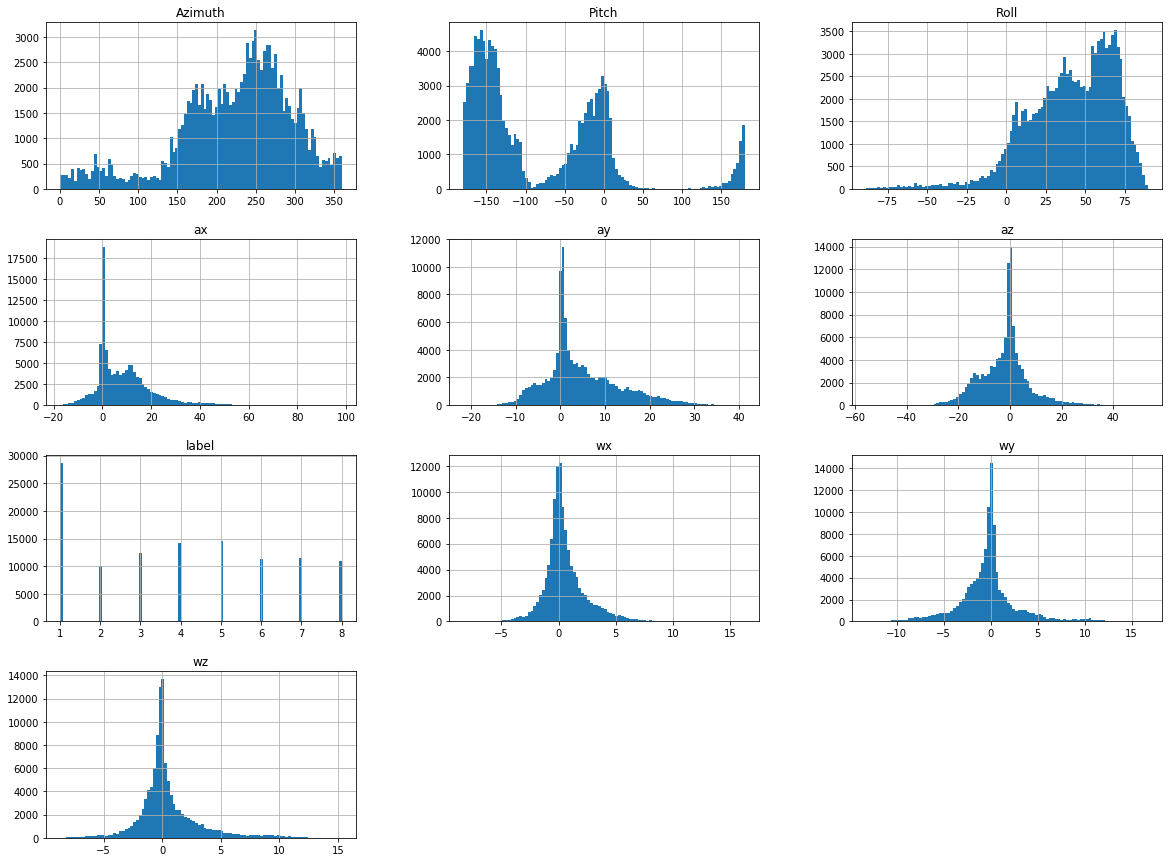

In [43]:

combined_df.hist(bins=100, figsize = (20,15))

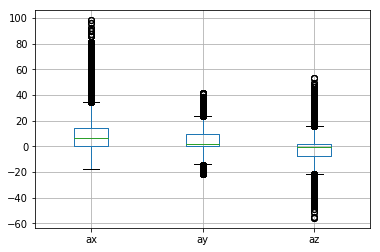

In [46]:
combined_df.boxplot(column=['ax','ay','az'])


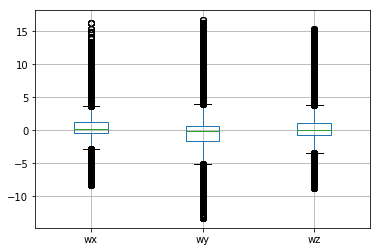

In [45]:
combined_df.boxplot(column=['wx','wy','wz'])


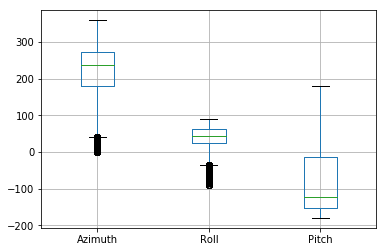

In [47]:
combined_df.boxplot(column=['Azimuth', 'Roll', 'Pitch'])


In [48]:
corr_matrix=combined_df.corr()
#corr_matrix ["c_ax"].sort_values(ascending=False)
(corr_matrix)

,ax,ay,az,wx,wy,wz,Azimuth,Pitch,Roll,label
ax,1.000000,0.187006,0.079116,0.216338,0.366555,0.453148,-0.026083,-0.011169,0.458910,0.215413
ay,0.187006,1.000000,-0.299361,0.269310,0.230159,0.122537,0.238487,-0.222032,-0.320412,0.527799
az,0.079116,-0.299361,1.000000,-0.266614,-0.168329,0.400068,-0.073853,0.334471,0.132840,-0.082862
wx,0.216338,0.269310,-0.266614,1.000000,0.402337,-0.096076,0.171438,-0.185220,-0.131978,0.240078
wy,0.366555,0.230159,-0.168329,0.402337,1.000000,0.108369,0.065133,-0.154741,0.072271,-0.080093
wz,0.453148,0.122537,0.400068,-0.096076,0.108369,1.000000,-0.102554,0.171085,0.141046,0.206612
Azimuth,-0.026083,0.238487,-0.073853,0.171438,0.065133,-0.102554,1.000000,-0.323664,-0.188822,0.050716
Pitch,-0.011169,-0.222032,0.334471,-0.185220,-0.154741,0.171085,-0.323664,1.000000,0.146195,0.078624
Roll,0.458910,-0.320412,0.132840,-0.131978,0.072271,0.141046,-0.188822,0.146195,1.000000,-0.371316
label,0.215413,0.527799,-0.082862,0.240078,-0.080093,0.206612,0.050716,0.078624,-0.371316,1.000000
